# Gradient Boosting

Gradient Boosting Algorithm (GBA) is a powerful machine learning technique used to build predictive models. It creates an ensemble of weak learners, meaning that it combines several smaller, simpler models to obtain a more accurate prediction than what an individual model would produce. Gradient boosting works by iteratively training the weak learners on gradient-based functions and incorporating them into the model as “boosted” participants. At its core, gradient boosting works by combining multiple gradient steps to build up a strong predicting model from weak estimators residing in a gradient function space with additional weak learners joining the gradient function space after each iteration of gradient boosting. At each step, gradient descent is used to identify which small components help the function most and are thus added to the overall gradient model. This allows for complicated problems such as data analysis, text processing, and image recognition to be solved with greater accuracy and enhanced performance in `GradientBoostingClassifier` and `GradientBoostingRegressor`.

```{figure} Gradient_Boosting_Trees.jpg
---
width: 600px
align: center
---
A simplified representation of Gradient Boosting Algorithm (GBA).
```

The gradient boosting algorithm is an effective machine learning method used to solve supervised learning problems, such as classification and regression. It is becoming increasingly popular among data scientists due to its ability to increase the accuracy of predictions. The algorithm works by iteratively constructing a series of decision trees, each aimed at rectifying errors made by its predecessors. The algorithm optimizes a loss function, usually the mean squared error for regression or the deviance (log loss) for classification `GradientBoostingClassifier` and `GradientBoostingRegressor`.

At its core, Gradient Boosting iteratively crafts a series of decision trees, each aimed at rectifying errors made by its predecessors. It optimizes a loss function, usually the mean squared error for regression or the deviance (log loss) for classification. The algorithm operates as follows {cite:p}`alpaydin2020introduction,james2023introduction,sklearnUserGuide`.

## Gradient Boosting Regressor and Classifier

1. **Initialization:**
   - Begin with a model set at a constant value, typically the mean of the target variable, serving as the initial prediction:

    \begin{equation}
    \hat{f}_0(x) = \underset{c}{\mathrm{argmin}} \sum_{i=1}^{n} L(y_i, c)
    \end{equation}

    The term $ L(y_i, c) $ represents the loss function, quantifying the difference between true target values ($y_i$) and predicted values ($c$). The algorithm aims to minimize this loss function during training. The model starts with a constant value ($c$), often set to the mean of the target variable, seeking the optimal constant value minimizing the overall loss across all data points. The specific form of the loss function ($L$) varies based on the problem type:

    - For regression problems, the Mean Squared Error (MSE) is commonly used:

    \begin{equation}
    L(y_i, c) = (y_i - c)^2
    \end{equation}

    - For classification problems, different loss functions, such as the deviance (log loss), may be employed.

2. **Boosting Iterations (b = 1 to B):**
    a. **Compute Negative Gradient:**

    \begin{equation}
    r_i = - \left[\frac{\partial L(y_i, \hat{f}(x_i))}{\partial \hat{f}(x_i)}\right]_{\hat{f}(x)=\hat{f}_{b-1}(x)}
    \end{equation}

    This expression signifies the negative gradient of the loss function ($L$) concerning the current model's predictions ($\hat{f}(x)$) at each data point ($x_i$). The partial derivative quantifies the sensitivity of the loss to changes in the model's prediction and is evaluated at the previous iteration's predictions ($\hat{f}_{b-1}(x)$). The negative gradient serves as a pseudo-residual in the training process.

    b. **Fit Decision Tree:** Fit a decision tree to the negative gradient (residuals) values ($r_i$) as the new target variable. This tree is typically shallow and controlled by hyperparameters like `max_depth`.
    
    c. **Update Model:**
    \begin{equation}
    \hat{f}_b(x) = \hat{f}_{b-1}(x) + \alpha \cdot \text{new_tree}(x)
    \end{equation}

    Update the model by incorporating the prediction from the new tree, scaled by a learning rate ($\alpha$).

3. **Final Prediction:**
    - The ultimate prediction is the sum of all individual trees:

    \begin{equation}
    \hat{f}(x) = \sum_{b=1}^{B} \hat{f}_b(x)
    \end{equation}

The Gradient Boosting algorithm optimizes a loss function, typically mean squared error for regression or deviance (log loss) for classification {cite:p}`alpaydin2020introduction,james2023introduction,sklearnUserGuide`.

```{figure} Gradient_Boosting_Flowchart.jpg
---
width: 450px
align: center
---
A visual representation of the above description.
```

## Scikit-learn Implementation

Scikit-learn offers the `GradientBoostingRegressor` and `GradientBoostingClassifier` classes for regression and classification tasks. These classes allow customization of hyperparameters like learning rate, tree depth, and the number of boosting iterations (`n_estimators`). Here's how to use them:

```python
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# For regression
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=3)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# For classification
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
```

Utilizing these classes simplifies the implementation of Gradient Boosting for regression and classification tasks within scikit-learn.

```{admonition} scikit-learn's Gradient Boosting Algorithms
:class: tip

1. **Initialization:**
   - Initialize the model's prediction as a constant value, often the mean of the target variable for regression or class probabilities for classification.
   - Compute the initial negative gradient (residuals) for regression or the negative gradient of the log-loss for classification.

2. **Boosting Iterations:**
   - For each boosting iteration (b = 1 to B), perform the following steps:

     a. **Construct a Decision Tree:**
        - Fit a decision tree to the negative gradient (residuals) or the negative gradient of the log-loss values as the new target variable.
        - The decision tree typically has a limited depth (controlled by hyperparameters like `max_depth`).

     b. **Update the Model:**
        - Compute the prediction from the new decision tree and scale it by a learning rate (α).
        - Update the model's prediction by adding the scaled tree prediction:

           \begin{equation} \hat{f}_b(x) = \hat{f}_{b-1}(x) + \alpha \cdot \text{new_tree}(x) \end{equation}

3. **Final Prediction:**
   - The final prediction is the sum of predictions from all individual trees:

      \begin{equation} \hat{f}(x) = \sum_{b=1}^{B} \hat{f}_b(x) \end{equation}

4. **Classification Specifics:**
   - For classification tasks, the class probabilities are often transformed into class labels using a threshold or argmax operation.

5. **Hyperparameters:**
   - The algorithm's behavior is influenced by hyperparameters like the number of boosting iterations (`n_estimators`), learning rate (`learning_rate`), maximum tree depth (`max_depth`), and more.

6. **Regularization:**
   - Regularization techniques, such as early stopping and subsampling, are commonly used to prevent overfitting and improve efficiency.

7. **Prediction and Evaluation:**
   - Use the trained model to make predictions on new data. For classification, the class with the highest probability (or predicted label) is assigned.
   - Evaluate the model's performance using appropriate metrics for regression or classification tasks.

Remember that while this description provides an overview of the algorithm, the actual implementation in scikit-learn includes optimizations and additional features. For comprehensive details, you can refer to scikit-learn's documentation on `GradientBoostingClassifier` and `GradientBoostingRegressor`.
```

## XGBoost (Extreme Gradient Boosting)

XGBoost (Extreme Gradient Boosting) is a highly optimized and popular gradient boosting framework that excels in performance and predictive accuracy. Developed by Tianqi Chen, XGBoost has become one of the go-to choices for structured data in machine learning competitions and real-world applications. It extends the basic gradient boosting algorithm by introducing enhancements and fine-tuning to achieve superior results. Here's an overview of the XGBoost algorithm {cite:p}`sklearnXGBoost`:

**Gradient Boosting Framework:**
XGBoost shares the fundamental idea of gradient boosting. It iteratively builds an ensemble of weak learners, usually decision trees, to form a powerful predictive model. Each weak learner attempts to correct the errors made by its predecessors.

**Key Features of XGBoost:**
XGBoost introduces several innovations that contribute to its remarkable performance:

1. **Regularization:** XGBoost includes L1 (Lasso) and L2 (Ridge) regularization terms in the optimization objective to control model complexity and prevent overfitting.

2. **Custom Loss Functions:** XGBoost allows the use of custom loss functions, extending its applicability to various problem domains.

3. **Handling Missing Values:** XGBoost can automatically handle missing values during tree construction.

4. **Feature Importance:** XGBoost provides insights into feature importance, aiding in understanding the model's decision-making process.

5. **Built-in Cross-Validation:** XGBoost includes a built-in cross-validation function for model assessment and hyperparameter tuning.

6. **Parallel and Distributed Computing:** XGBoost supports parallel and distributed computing to accelerate training on large datasets.

7. **Pruning:** XGBoost employs a technique called "pruning" to remove splits that lead to negative gains during tree growth, improving efficiency.

**XGBoost Algorithm:**
The XGBoost algorithm, like gradient boosting, consists of iterative steps to build an ensemble of decision trees. The main steps are as follows:

1. **Initialization:**
   - Start with a constant prediction (often the mean of the target variable for regression) for all instances.
   - Compute the initial gradient (negative gradient of the loss function) for each instance.

2. **Boosting Iterations:**
   - For each boosting iteration (b = 1 to B), perform these steps:

     a. **Construct a Decision Tree:**
        - Fit a decision tree to the negative gradient values, incorporating regularization terms.
        - Prune the tree using depth and gain-based criteria.

     b. **Update the Model:**
        - Compute the prediction from the new tree and scale it by a learning rate (α).
        - Update the model's prediction by adding the scaled tree prediction.

     c. **Update the Gradient:**
        - Compute the new gradient using the residuals (negative gradient) from the previous iteration.

3. **Final Prediction:**
   - The final prediction is the sum of predictions from all individual trees.

**XGBoost Implementation:**
XGBoost is implemented as a Python package with wrappers for various programming languages. The Python API allows you to create instances of `xgboost.XGBRegressor` for regression tasks and `xgboost.XGBClassifier` for classification tasks. These classes provide a wide range of hyperparameters for fine-tuning, such as learning rate, maximum depth, and regularization terms.

XGBoost's flexibility, scalability, and performance make it a popular choice for many machine learning projects, especially when working with structured data. Its advanced features and optimizations contribute to its effectiveness in achieving high predictive accuracy. For comprehensive details, you can refer to the official XGBoost documentation and resources.

<font color='Blue'><b>Example</b></font>. Consider the Auto MPG dataset retrieved from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/dataset/9/auto+mpg). We will now apply these concepts by actively engaging with this dataset.

In [1]:
import pandas as pd
# You can download the dataset from: http://archive.ics.uci.edu/static/public/9/auto+mpg.zip

# Define column names based on the dataset's description
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model_Year', 'Origin', 'Car_Name']

# Read the dataset with column names, treating '?' as missing values, and remove rows with missing values
auto_mpg_df = pd.read_csv('auto-mpg.data', names=column_names,
                          na_values='?', delim_whitespace=True).dropna().reset_index(drop = True)

# Remove the 'Car_Name' column from the DataFrame
auto_mpg_df = auto_mpg_df.drop(columns=['Car_Name'])

# Display the resulting DataFrame
display(auto_mpg_df)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

# Extract the features (X) and target variable (y)
X = auto_mpg_df.drop(columns=['MPG'])
y = np.log(auto_mpg_df.MPG.values)  # Take the natural logarithm of the MPG values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
set_size_df = pd.DataFrame({'Size': [len(X_train), len(X_test)]}, index = ['Train', 'Test'])
display(set_size_df.T)

,Train,Test
Size,294,98


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Using sklearn's GradientBoostingRegressor
	MSE (Train) = 2.864e-03, MSE (Test) = 1.403e-02
Using xgboost's XGBRegressor
	MSE (Train) = 3.150e-06, MSE (Test) = 1.620e-02


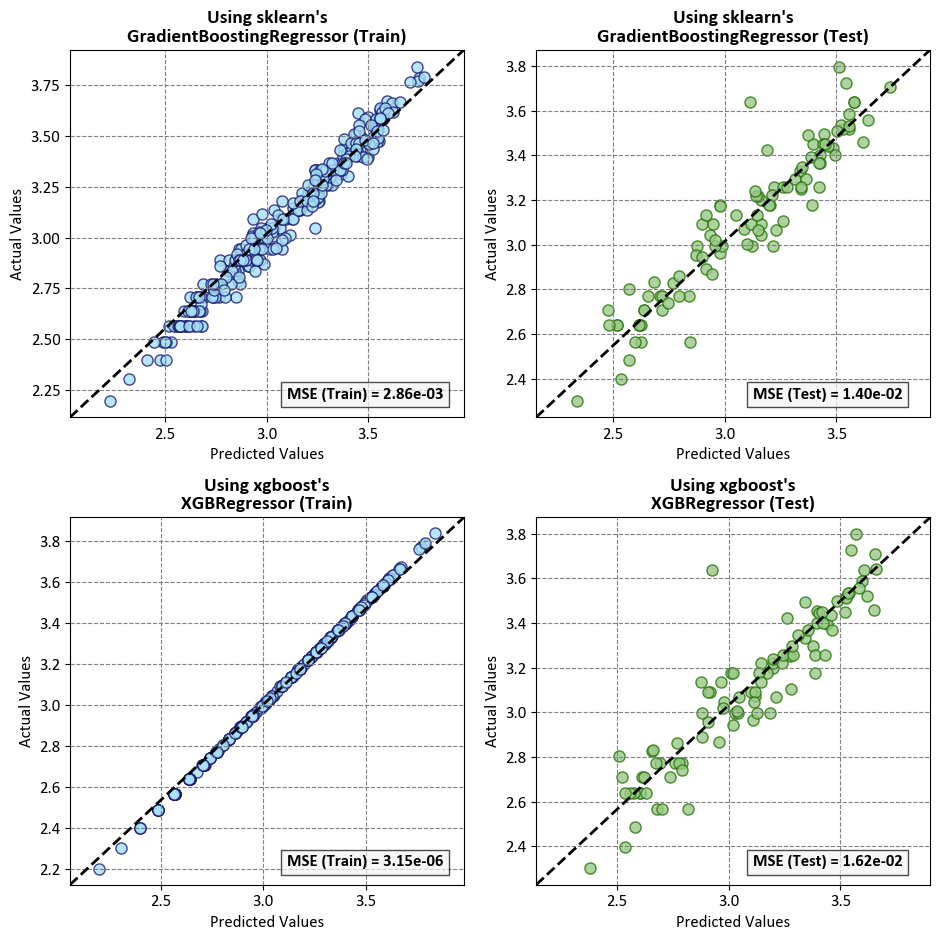

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
random_state = 0
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn import metrics
import sklearnex
sklearnex.patch_sklearn()
plt.style.use('../mystyle.mplstyle')

# Create a figure and subplots
fig, ax = plt.subplots(2, 2, figsize=(9.5, 9.5))
feature_set_labels = ["""Using sklearn's\nGradientBoostingRegressor""",
                      """Using xgboost's\nXGBRegressor"""]

def print_bold(txt, c=31):
    """
    Function to print text in bold with specified color.

    Parameters:
    - txt (str): Text to be printed.
    - c (int): Color code for the printed text.

    Returns:
    None
    """
    print(f"\033[1;{c}m" + txt + "\033[0m")
    
# Loop through different feature sets
for i, regressor_class in enumerate([GradientBoostingRegressor, xgb.XGBRegressor]):
    # Create a Random Forest Regressor
    reg = regressor_class(random_state = random_state)
    reg.fit(X_train, y_train)
    
    # Train set
    y_pred_train = reg.predict(X_train)
    ax[i, 0].scatter(y_pred_train, y_train,
                     facecolors='#a7e0f7', edgecolors='#191970', alpha=0.8)
    ax[i, 0].plot([0, 1], [0, 1], '--k', lw=2, transform=ax[i, 0].transAxes)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    txt_train = f'MSE (Train) = {mse_train:.2e}'
    text_train = ax[i, 0].text(0.55, 0.05, txt_train,
                               transform=ax[i, 0].transAxes, fontsize=12, weight='bold',
                               bbox=dict(facecolor='Whitesmoke', alpha=0.7))
    ax[i, 0].set(xlabel='Predicted Values', ylabel='Actual Values')
    ax[i, 0].set_title(f'{feature_set_labels[i]} (Train)', fontsize=14, weight='bold')
    ax[i, 0].axis('equal')
    
    # Test set
    y_pred_test = reg.predict(X_test)
    ax[i, 1].scatter(y_pred_test, y_test,
                     facecolors='#9ac989', edgecolors='#217304', alpha=0.8)
    ax[i, 1].plot([0, 1], [0, 1], '--k', lw=2, transform=ax[i, 1].transAxes)
    mse_test = metrics.mean_squared_error(y_test, y_pred_test)
    txt_test = f'MSE (Test) = {mse_test:.2e}'
    text_test = ax[i, 1].text(0.55, 0.05, txt_test,
                              transform=ax[i, 1].transAxes, fontsize=12, weight='bold',
                              bbox=dict(facecolor='Whitesmoke', alpha=0.7))
    ax[i, 1].set(xlabel='Predicted Values', ylabel='Actual Values')
    ax[i, 1].set_title(f'{feature_set_labels[i]} (Test)', fontsize=14, weight='bold')
    ax[i, 1].axis('equal')

    # Print MSE values
    txt = f'MSE (Train) = {mse_train:.3e}, MSE (Test) = {mse_test:.3e}'
    print_bold(feature_set_labels[i].replace('\n',' '))
    print(f'\t{txt}')

# Adjust layout and display the plots
plt.tight_layout()
sklearnex.unpatch_sklearn()

Two models using `sklearn`'s `GradientBoostingRegressor` and `xgboost`'s `XGBRegressor` with default parameters. Both models were trained on the same dataset, which includes the following features: `Cylinders`, `Displacement`, `Horsepower`, `Weight`, `Acceleration`, `Model_Year`, and `Origin`. The target variable is `np.log(MPG)`.

The **mean squared error (MSE)** is a measure of how well the model fits the data. A lower MSE indicates a better fit. The MSE values you provided are as follows:

- Using `sklearn`'s `GradientBoostingRegressor`: MSE (Train) = 2.864e-03, MSE (Test) = 1.403e-02
- Using `xgboost`'s `XGBRegressor`: MSE (Train) = 3.150e-06, MSE (Test) = 1.620e-02

Overall, both models demonstrate competence in fitting the `ln(MPG)` values, with the `XGBRegressor` excelling in the training phase. However, the testing phase reveals nuances, emphasizing the importance of assessing a model's generalization performance on unseen data. Further analysis, considering factors such as feature importance and hyperparameter tuning, is recommended to comprehensively evaluate and compare the models' performance.

`````{admonition} Note
:class: warning

"Scikit-learn extensions" or "sklearnex" refers to additional modules or libraries that build upon the scikit-learn library, which is a machine learning library for Python. These extensions typically provide extra functionality, new algorithms, or improved features to enhance the capabilities of scikit-learn in various ways. The term "sklearnex" may encompass a range of third-party contributions aimed at extending and complementing the existing scikit-learn ecosystem.

The function `sklearnex.patch_sklearn()` is a method within the scikit-learn extensions framework. Its primary purpose is to patch or modify the behavior of the scikit-learn library by incorporating additional functionalities or improvements provided by sklearnex.

This function is typically employed to seamlessly integrate the extensions into the scikit-learn library, ensuring that the enhanced features or modifications become part of the standard scikit-learn functionality. By invoking `sklearnex.patch_sklearn()`, users can apply the necessary adjustments to the scikit-learn library, enabling the utilization of extended capabilities offered by the sklearnex framework within their machine learning workflows. Additional information can be found by referring to the documentation available [here](https://github.com/intel/scikit-learn-intelex).
`````

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


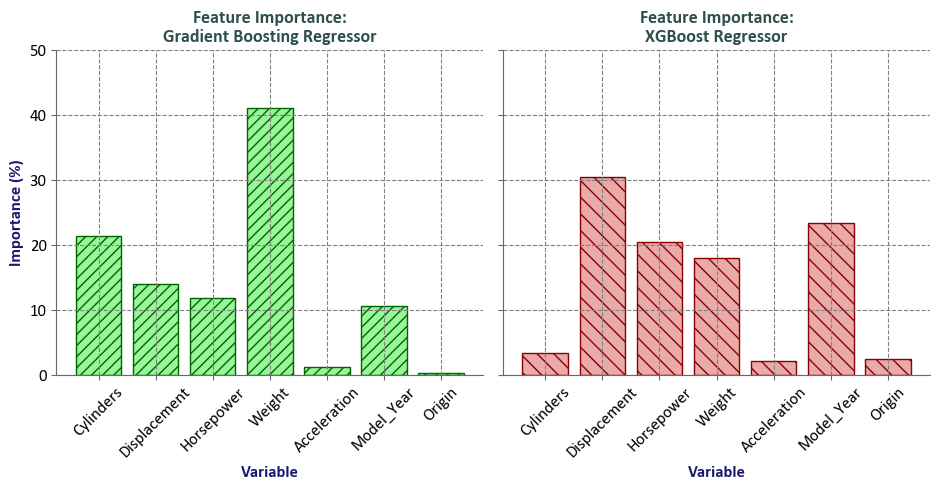

In [4]:
import sklearnex
sklearnex.patch_sklearn()

# Initialize and train the models
# Initialize the GradientBoostingRegressor model
random_state = 0
reg_gb = GradientBoostingRegressor(random_state= random_state)
reg_gb.fit(X_train, y_train)

# Initialize the XGBRegressor model
reg_xgb = xgb.XGBRegressor(random_state = random_state)
reg_xgb.fit(X_train, y_train)

# Create DataFrames with feature importances
# Create a DataFrame for feature importances using GradientBoostingRegressor
importance_gb = pd.DataFrame({'Importance': reg_gb.feature_importances_ * 100}, index=X.columns)

# Create a DataFrame for feature importances using XGBRegressor
importance_xgb = pd.DataFrame({'Importance': reg_xgb.feature_importances_ * 100}, index=X.columns)

# Create subplots
# Create a figure with two vertically stacked subplots
fig, axes = plt.subplots(1, 2, figsize=(9.5, 5), sharey=True)
axes = axes.ravel()

# Plot feature importance for GradientBoostingRegressor
# Create a bar plot for feature importance in the first subplot
axes[0].bar(importance_gb.index, importance_gb.Importance, color='#99f599', edgecolor='#006400', hatch="///")
axes[0].set_title('Feature Importance:\nGradient Boosting Regressor', fontsize=13, weight='bold', color='DarkSlateGray')
axes[0].set_ylim([0, 50])

# Plot feature importance for XGBRegressor
# Create a bar plot for feature importance in the second subplot
axes[1].bar(importance_xgb.index, importance_xgb.Importance, color='#e9aaaa', edgecolor='#8B0000', hatch="\\\\")
axes[1].set_title('Feature Importance:\nXGBoost Regressor', fontsize=13, weight='bold', color='DarkSlateGray')

# Common settings for both subplots
# Iterate through the axes and apply common settings
for ax in axes:
    ax.set_xlabel('Variable', weight='bold', color='MidnightBlue')
    ax.tick_params(axis='x', rotation=45, color='DimGray')
    ax.tick_params(axis='y', color='DimGray')
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['bottom', 'left']].set_color('DimGray')
    ax.set_ylabel('Importance (%)', weight='bold', color='MidnightBlue')

# Remove the ylabel for the right plot
axes[1].set_ylabel('')

# Adjust layout and display the plots
plt.tight_layout()
sklearnex.unpatch_sklearn()

In [5]:
# Merge importance_gb and importance_xgb DataFrames
merged_importance = pd.merge(importance_gb, importance_xgb, left_index=True, right_index=True,
                              suffixes=('_GB', '_XGB'))

# Display the merged DataFrame with background gradient
display(merged_importance.style.format(precision=2).background_gradient(cmap='YlGnBu', axis=1, vmin = 0, vmax =50))

,Importance_GB,Importance_XGB
Cylinders,21.36,3.36
Displacement,13.90,30.40
Horsepower,11.79,20.48
Weight,41.09,17.92
Acceleration,1.21,2.09
Model_Year,10.49,23.39
Origin,0.16,2.35


**Feature Importance Comparison Report**

- `GradientBoostingRegressor`: The feature importance values are calculated based on the **mean decrease impurity (MDI)** method. The MDI method computes the total reduction of the criterion brought by a feature to all the trees in the ensemble. The higher the value, the more important the feature is in predicting the target variable. In this case, the most important feature is `Weight` with an importance value of 41.09, followed by `Cylinders` with an importance value of 21.36. The `GradientBoostingRegressor` estimator fits a sequence of regression trees on the negative gradient of the loss function. The `loss` parameter specifies the loss function to be optimized, and the `learning_rate` parameter shrinks the contribution of each tree by `learning_rate`. The `n_estimators` parameter specifies the number of boosting stages to perform. The `max_depth` parameter controls the maximum depth of the individual regression trees. The `min_samples_split` parameter specifies the minimum number of samples required to split an internal node, and the `min_samples_leaf` parameter specifies the minimum number of samples required to be at a leaf node {cite:p}`sklearnXGBoost`.

- `XGBRegressor`: The feature importance values are calculated based on the **gain** method. The gain method computes the average gain of each feature when it is used in splits. The higher the value, the more important the feature is in predicting the target variable. In this case, the most important feature is `Displacement` with an importance value of 30.40, followed by `Model_Year` with an importance value of 23.39. The `XGBRegressor` estimator fits a sequence of regression trees on the negative gradient of the loss function. The `learning_rate` parameter shrinks the contribution of each tree by `learning_rate`, and the `n_estimators` parameter specifies the number of boosting stages to perform. The `max_depth` parameter controls the maximum depth of the individual regression trees. The `min_child_weight` parameter specifies the minimum sum of instance weight (hessian) needed in a child. The `gamma` parameter specifies the minimum loss reduction required to make a further partition on a leaf node of the tree. The `subsample` parameter specifies the fraction of samples to be used for fitting the individual base learners. The `colsample_bytree` parameter specifies the fraction of columns to be randomly sampled for each tree. The `reg_alpha` parameter specifies L1 regularization term on weights, and the `reg_lambda` parameter specifies L2 regularization term on weights {cite:p}`sklearnUserGuide`.

`````{admonition} Note
:class: warning

It's important to note that feature importance does not necessarily imply causation or directionality. Instead, it indicates the relative importance of each feature in predicting the target variable. The feature importance values can be used to identify the most relevant features for the task at hand and to gain insights into the underlying data. However, it's important to keep in mind that the feature importance values are based on the specific model and dataset used, and may not generalize to other models or datasets. Therefore, it's recommended to perform a thorough analysis of the models and data before drawing any conclusions based on the feature importance values {cite:p}`géron2022hands`.

`````

<font color='Blue'><b>Example:</b></font> The [digits dataset](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits) comprises a collection of 8x8 pixel images depicting various numerical digits. Within the dataset, the 'images' attribute holds 8x8 arrays representing grayscale values corresponding to each image. For illustrative purposes, we will leverage these arrays to visualize the initial four images. Notably, the 'target' attribute in the dataset retains information about the numerical digit portrayed by each image. This informative detail is seamlessly incorporated into the titles of the four plots showcased below.

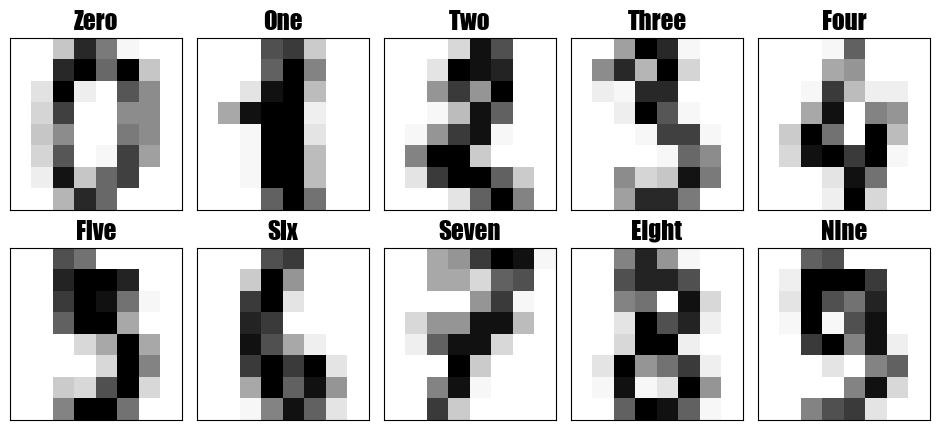

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Create a dictionary to map labels to their word representations
Labels_dict = dict(zip(np.arange(10), ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']))


# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(9.5, 4.5), subplot_kw={'xticks': [], 'yticks': []})
ax = ax.ravel()

# Set custom font for titles
font = FontProperties()
font.set_family('fantasy')

# Load the digits dataset
digits = load_digits()

# Iterate over images and labels
for ax, (image, label) in zip(ax, zip(digits.images, digits.target)):
    ax.imshow(image, cmap='Greys', interpolation='nearest')
    ax.set_title(f'{Labels_dict[label]}', fontproperties=font, fontsize= 18)
    ax.set_aspect(1)

# Normalize images and set target labels
X = digits.images / 256.0
y = digits.target

# Adjust layout and display the plots
plt.tight_layout()

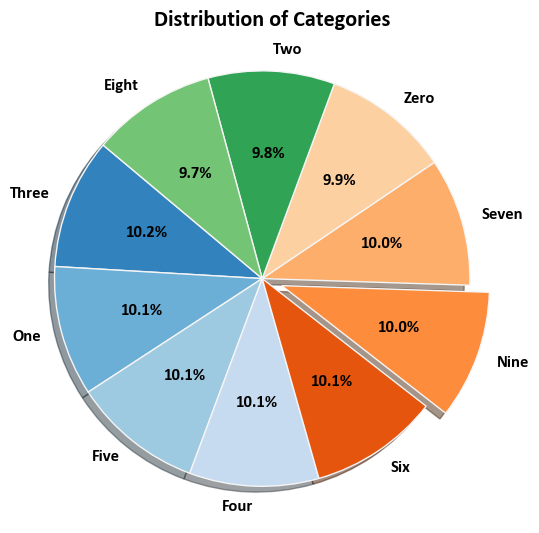

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def _dist_plot(ax, y, Labels_dict=Labels_dict, CM=plt.cm.tab20c.colors, title=False):
    """
    Generate a pie chart illustrating the distribution of categories.

    Parameters:
    - ax: Axes object to plot on.
    - y: Input data for which the distribution is to be visualized.
    - Labels_dict: Dictionary mapping category indices to labels.
    - CM: Color map for the pie chart.
    - title: Title for the plot. Set to False to omit.

    Returns:
    None
    """
    # Prepare data for the pie chart
    df = pd.Series(y).value_counts().to_frame('Count')

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(df['Count'],
                                      labels=[Labels_dict[i] for i in df.index],
                                      autopct='%1.1f%%', startangle=140,
                                      colors=CM,
                                      explode=[0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0],
                                      shadow=True, wedgeprops={'edgecolor': 'whitesmoke'})
    # Set title and ensure equal aspect ratio for a circular pie chart
    if title:
        _ = ax.set_title(title, fontsize=16, weight='bold')
    _ = ax.axis('equal')

    # Highlight the labels with annotations
    for text, autotext in zip(texts, autotexts):
        text.set_fontsize(12)
        text.set_fontweight('bold')
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(5.5, 5.5))
_dist_plot(ax, y, title='Distribution of Categories')

# Adjust layout and display the plot
plt.tight_layout()

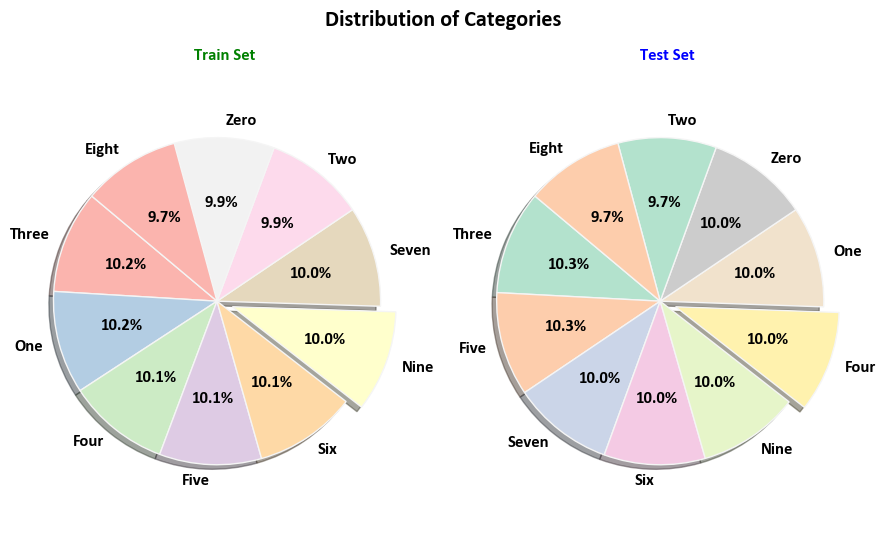

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(9, 5.5))
_dist_plot(ax[0], y_train, CM = plt.cm.Pastel1.colors)
_ = ax[0].set_title('Train Set', fontsize=12, weight='bold', color='Green')
_dist_plot(ax[1], y_test, CM = plt.cm.Pastel2.colors)
_ = ax[1].set_title('Test Set', fontsize=12, weight='bold', color='Blue')
_ = fig.suptitle('Distribution of Categories', fontsize=16, weight='bold')

# Adjust layout and display the plot
plt.tight_layout()

In [9]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import sklearnex
sklearnex.patch_sklearn()
# ------------------------------
# Gradient Boosting Classifier
# ------------------------------

# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

# Fit the classifier to the training data
gb_classifier.fit(X_train.reshape(-1, 64), y_train)

# Evaluate the classifier on the test data
gb_accuracy = gb_classifier.score(X_test.reshape(-1, 64), y_test)
print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy:.4f}")

# ------------------------------
# XGBoost Classifier
# ------------------------------

# Create an XGBClassifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

# Fit the classifier to the training data
xgb_classifier.fit(X_train.reshape(-1, 64), y_train)

# Predict using the classifier
y_pred = xgb_classifier.predict(X_test.reshape(-1, 64))

# Calculate accuracy using accuracy_score
xgb_accuracy = accuracy_score(y_test, y_pred)
print(f"XGB Classifier Accuracy: {xgb_accuracy:.4f}")
sklearnex.unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Gradient Boosting Classifier Accuracy: 0.9583
XGB Classifier Accuracy: 0.9611


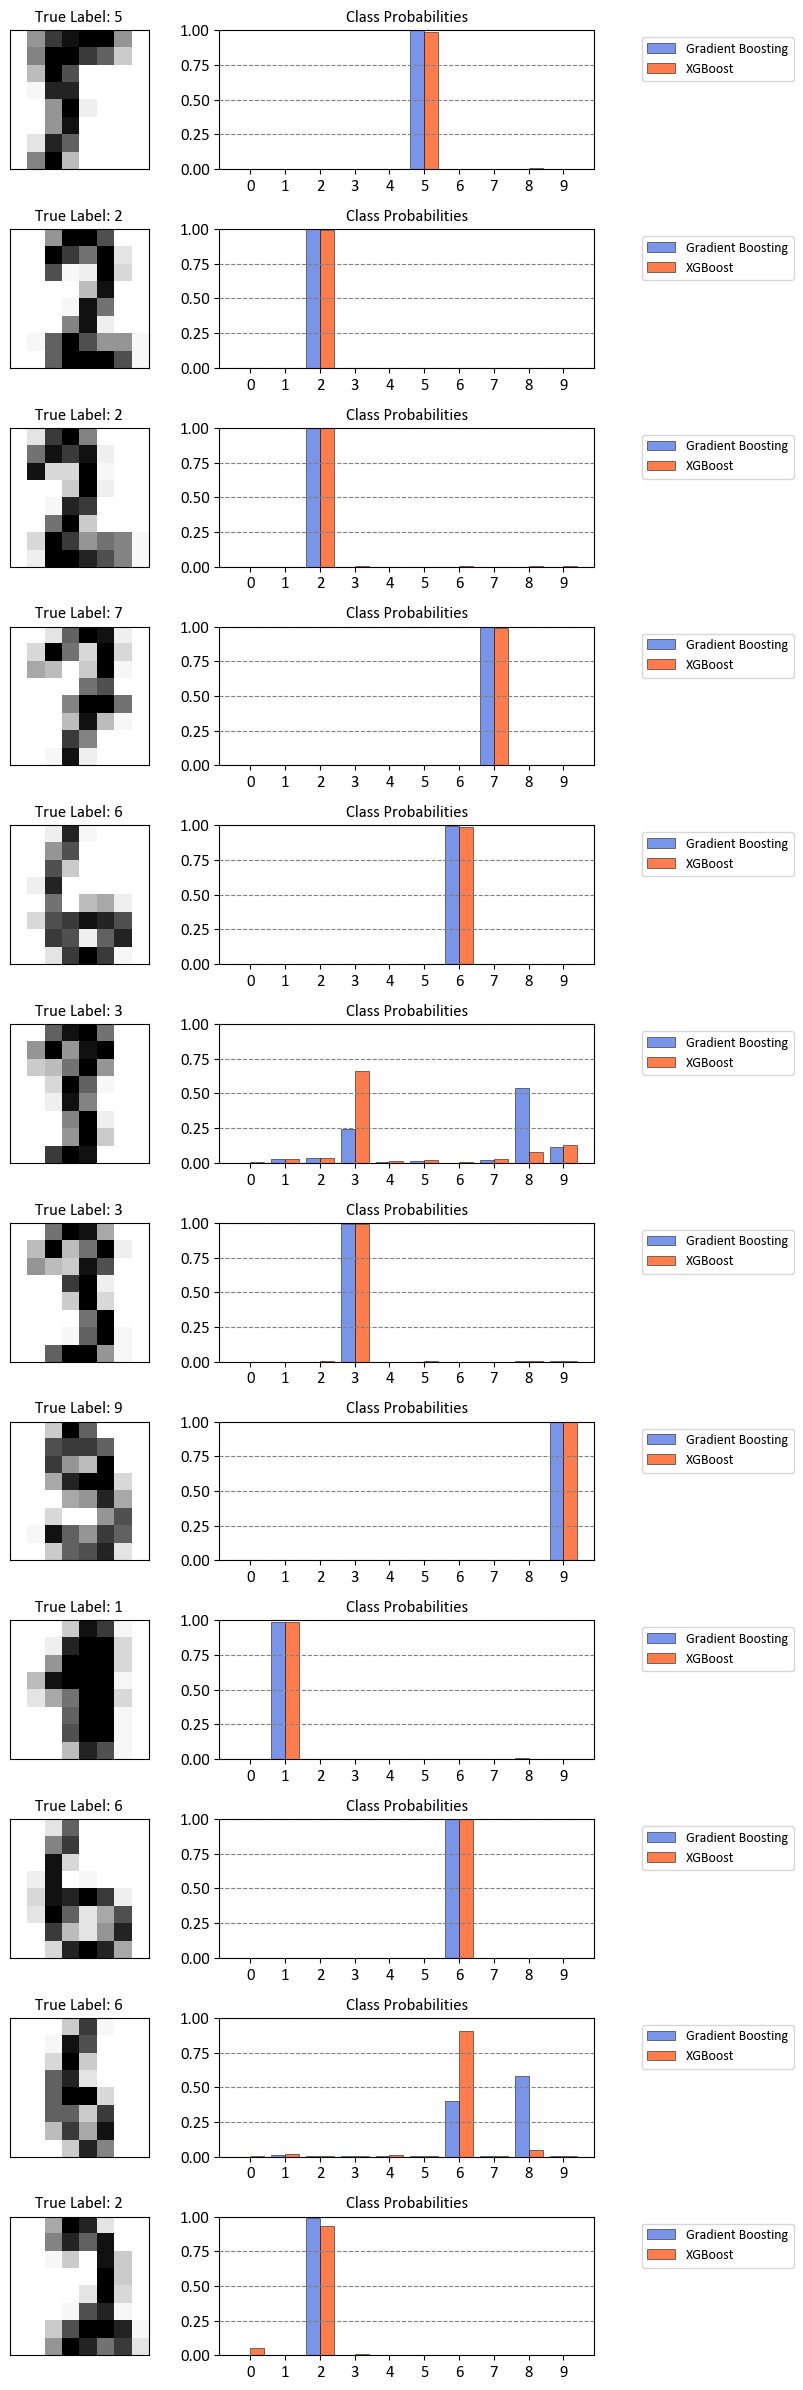

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Update the Matplotlib settings using the dictionary
plt.rcParams.update({'axes.grid.axis': 'y'})

# Choose indices from the test set to visualize
test_indices = np.random.randint(1, len(y_test) + 1, size=12)

# Create subplots grid
num_rows = len(test_indices)
fig, axs = plt.subplots(num_rows, 2, figsize=(9, 2 * num_rows))

for i, test_index in enumerate(test_indices):
    selected_sample = X_test[test_index]
    true_label = y_test[test_index]

    # Predict probabilities using the GradientBoostingClassifier
    probs_gb = gb_classifier.predict_proba(selected_sample.reshape(1, -1))

    # Predict probabilities using the XGBClassifier
    probs_xgb = xgb_classifier.predict_proba(selected_sample.reshape(1, -1))

    # Visualize the selected sample on the left side
    axs[i, 0].imshow(selected_sample, cmap='Greys', interpolation='nearest')
    axs[i, 0].set_title(f"True Label: {true_label}")
    axs[i, 0].set(xticks=[], yticks=[])

    # Plot probabilities on the right side
    bar_width = 0.4  # Adjust this value for spacing
    axs[i, 1].bar(np.arange(10) - bar_width/2, probs_gb[0], color = 'RoyalBlue',
                  width=bar_width, label='Gradient Boosting', alpha=0.7, ec = 'k', lw = 0.5)
    axs[i, 1].bar(np.arange(10) + bar_width/2, probs_xgb[0], color = 'OrangeRed',
                  width=bar_width, label='XGBoost', alpha=0.7, ec = 'k', lw = 0.5)
    axs[i, 1].set(xticks=range(10), xticklabels=[str(i) for i in range(10)],
                  ylim=[0, 1], title = "Class Probabilities")
    axs[i, 1].legend(loc='upper right', bbox_to_anchor=(1.55, 1))

plt.tight_layout()